# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTENC
from plotly import graph_objs as go


# Import Dataset

In [2]:
initial_df = pd.read_excel('C:/Users/lucac/Downloads/default of credit card clients.xls')
initial_df.head().T

,0,1,2,3,4
Unnamed: 0,ID,1,2,3,4
X1,LIMIT_BAL,20000,120000,90000,50000
X2,SEX,2,2,2,2
X3,EDUCATION,2,2,2,2
X4,MARRIAGE,1,2,2,1
X5,AGE,24,26,34,37
X6,PAY_0,2,-1,0,0
X7,PAY_2,2,2,0,0
X8,PAY_3,-1,0,0,0
X9,PAY_4,-1,0,0,0


# Trivial operations on data (rows/cols adjusting, duplicates removal)



In [3]:
initial_df.columns = initial_df.iloc[0]
initial_df = initial_df.drop(0)
initial_df = initial_df.reset_index(drop=True).astype('int32')
initial_df = initial_df.drop(columns='ID')

In [4]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int32
 1   SEX                         30000 non-null  int32
 2   EDUCATION                   30000 non-null  int32
 3   MARRIAGE                    30000 non-null  int32
 4   AGE                         30000 non-null  int32
 5   PAY_0                       30000 non-null  int32
 6   PAY_2                       30000 non-null  int32
 7   PAY_3                       30000 non-null  int32
 8   PAY_4                       30000 non-null  int32
 9   PAY_5                       30000 non-null  int32
 10  PAY_6                       30000 non-null  int32
 11  BILL_AMT1                   30000 non-null  int32
 12  BILL_AMT2                   30000 non-null  int32
 13  BILL_AMT3                   30000 non-null  int32
 14  BILL_A

In [5]:
initial_df = initial_df.drop_duplicates()
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29965 non-null  int32
 1   SEX                         29965 non-null  int32
 2   EDUCATION                   29965 non-null  int32
 3   MARRIAGE                    29965 non-null  int32
 4   AGE                         29965 non-null  int32
 5   PAY_0                       29965 non-null  int32
 6   PAY_2                       29965 non-null  int32
 7   PAY_3                       29965 non-null  int32
 8   PAY_4                       29965 non-null  int32
 9   PAY_5                       29965 non-null  int32
 10  PAY_6                       29965 non-null  int32
 11  BILL_AMT1                   29965 non-null  int32
 12  BILL_AMT2                   29965 non-null  int32
 13  BILL_AMT3                   29965 non-null  int32
 14  BILL_A

In [6]:
initial_df = initial_df.reset_index()

# Statistical explorations


In [7]:
numerical = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
labels_renamed = {'SEX': ['male', 'female'], 
                  'EDUCATION': ['graduate school', 'university', 'high school', 'others'],
                  'MARRIAGE': ['married', 'single', 'others'], 
                  'PAY_0':['pay duly', 'delay 1m', 'delay 2m', 'delay 3m', 'delay 4m', 'delay 5m', 'delay 6m', 'delay 7m', 'delay 8m', 'delay +8m'],
                  'PAY_2':['pay duly', 'delay 1m', 'delay 2m', 'delay 3m', 'delay 4m', 'delay 5m', 'delay 6m', 'delay 7m', 'delay 8m', 'delay +8m'],
                  'PAY_3':['pay duly', 'delay 1m', 'delay 2m', 'delay 3m', 'delay 4m', 'delay 5m', 'delay 6m', 'delay 7m', 'delay 8m', 'delay +8m'],
                  'PAY_4':['pay duly', 'delay 1m', 'delay 2m', 'delay 3m', 'delay 4m', 'delay 5m', 'delay 6m', 'delay 7m', 'delay 8m', 'delay +8m'],
                  'PAY_5':['pay duly', 'delay 1m', 'delay 2m', 'delay 3m', 'delay 4m', 'delay 5m', 'delay 6m', 'delay 7m', 'delay 8m', 'delay +8m'],
                  'PAY_6':['pay duly', 'delay 1m', 'delay 2m', 'delay 3m', 'delay 4m', 'delay 5m', 'delay 6m', 'delay 7m', 'delay 8m', 'delay +8m']}

In [8]:
initial_df[numerical].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,35.487969,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014
std,129760.135222,9.219459,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000
50%,140000.000000,34.000000,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [9]:
initial_df[categorical].describe()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,1.603738,1.853629,1.551877,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438
std,0.489128,0.790411,0.521997,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [10]:
initial_df = initial_df.drop('index',axis=1)

In [11]:
# inspect the cardinality of unknown values for categorical variables (understand where we can drop)

for cat in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    print(initial_df[cat].value_counts()[[0,-2]])
    print()
    
print(initial_df['EDUCATION'].value_counts()[[0,5,6]])
print()
print(initial_df['MARRIAGE'].value_counts()[[0]])



 0    14737
-2     2750
Name: PAY_0, dtype: int64

 0    15730
-2     3752
Name: PAY_2, dtype: int64

 0    15764
-2     4055
Name: PAY_3, dtype: int64

 0    16455
-2     4318
Name: PAY_4, dtype: int64

 0    16947
-2     4516
Name: PAY_5, dtype: int64

 0    16286
-2     4865
Name: PAY_6, dtype: int64

0     14
5    280
6     51
Name: EDUCATION, dtype: int64

0    54
Name: MARRIAGE, dtype: int64


# Unknown values management


In [12]:
# 'sex' field has values (1,2): it's useful to map them to the more usual (0,1) 
initial_df['SEX'] = initial_df['SEX']-1 
# this occurs also for the fields 'PAY_i': values (-2, 0) are not defined, so we assume they also refer to pay duly and turn them to -1:
for cat in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    initial_df[cat] = initial_df[cat].replace([0,-2],-1)


In [13]:
# get rid of unknown values for 'EDUCATION' and 'MARRIAGE' fields
msk = ((initial_df['EDUCATION']!=0) & (initial_df['EDUCATION']!=5) & (initial_df['EDUCATION']!=6) & (initial_df['MARRIAGE']!=0))
initial_df = initial_df[msk]
initial_df = initial_df.reset_index()


In [14]:
initial_df.T

,0,1,2,3,4,5,6,7,8,9,...,29556,29557,29558,29559,29560,29561,29562,29563,29564,29565
0,,,,,,,,,,,,,,,,,,,,,
index,0,1,2,3,4,5,6,7,8,9,...,29955,29956,29957,29958,29959,29960,29961,29962,29963,29964
LIMIT_BAL,20000,120000,90000,50000,50000,50000,500000,100000,140000,20000,...,140000,210000,10000,100000,80000,220000,150000,30000,80000,50000
SEX,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
EDUCATION,2,2,2,2,2,1,1,2,3,3,...,2,2,3,1,2,3,3,2,3,2
MARRIAGE,1,2,2,1,1,2,2,2,1,2,...,1,1,1,2,2,1,2,2,1,1
AGE,24,26,34,37,57,37,29,23,28,35,...,41,34,43,38,34,39,43,37,41,46
PAY_0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,3,-1,-1,2,-1,-1,4,1,-1
PAY_2,2,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,2,-1,-1,2,-1,-1,3,-1,-1
PAY_3,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,...,-1,2,-1,-1,2,-1,-1,2,-1,-1


# Variables' distributions vizualization


In [15]:
yesMask = (initial_df['default payment next month']==1)
yesDf = initial_df[yesMask]
noDf = initial_df[~yesMask]

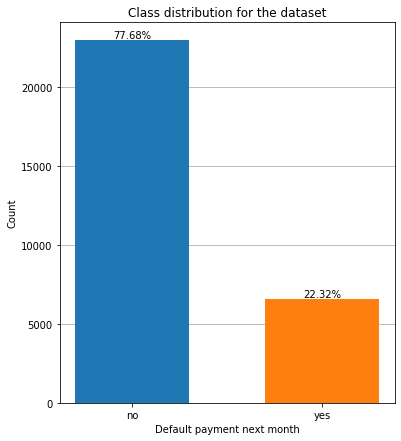

In [16]:
truth_labels_renamed = ['no', 'yes']
counts = [noDf.shape[0], yesDf.shape[0]]
plt.figure(figsize=(6,7))
plt.rc('axes', axisbelow=True)
plt.grid(zorder=0, axis='y')
fig1 = plt.bar(truth_labels_renamed[0], counts[0], width=0.6)
fig2 = plt.bar(truth_labels_renamed[1], counts[1], width=0.6)

plt.ylabel('Count')
plt.xlabel('Default payment next month')
plt.title('Class distribution for the dataset')
plt.text(fig1.patches[0].get_x() + fig1.patches[0].get_width()/2., counts[0]+0.15,
        '%.2f%%' % float(counts[0]/sum(counts)*100),
        ha='center', va='bottom')
plt.text(fig2.patches[0].get_x() + fig2.patches[0].get_width()/2., counts[1]+0.15,
        '%.2f%%' % float(counts[1]/sum(counts)*100),
        ha='center', va='bottom')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

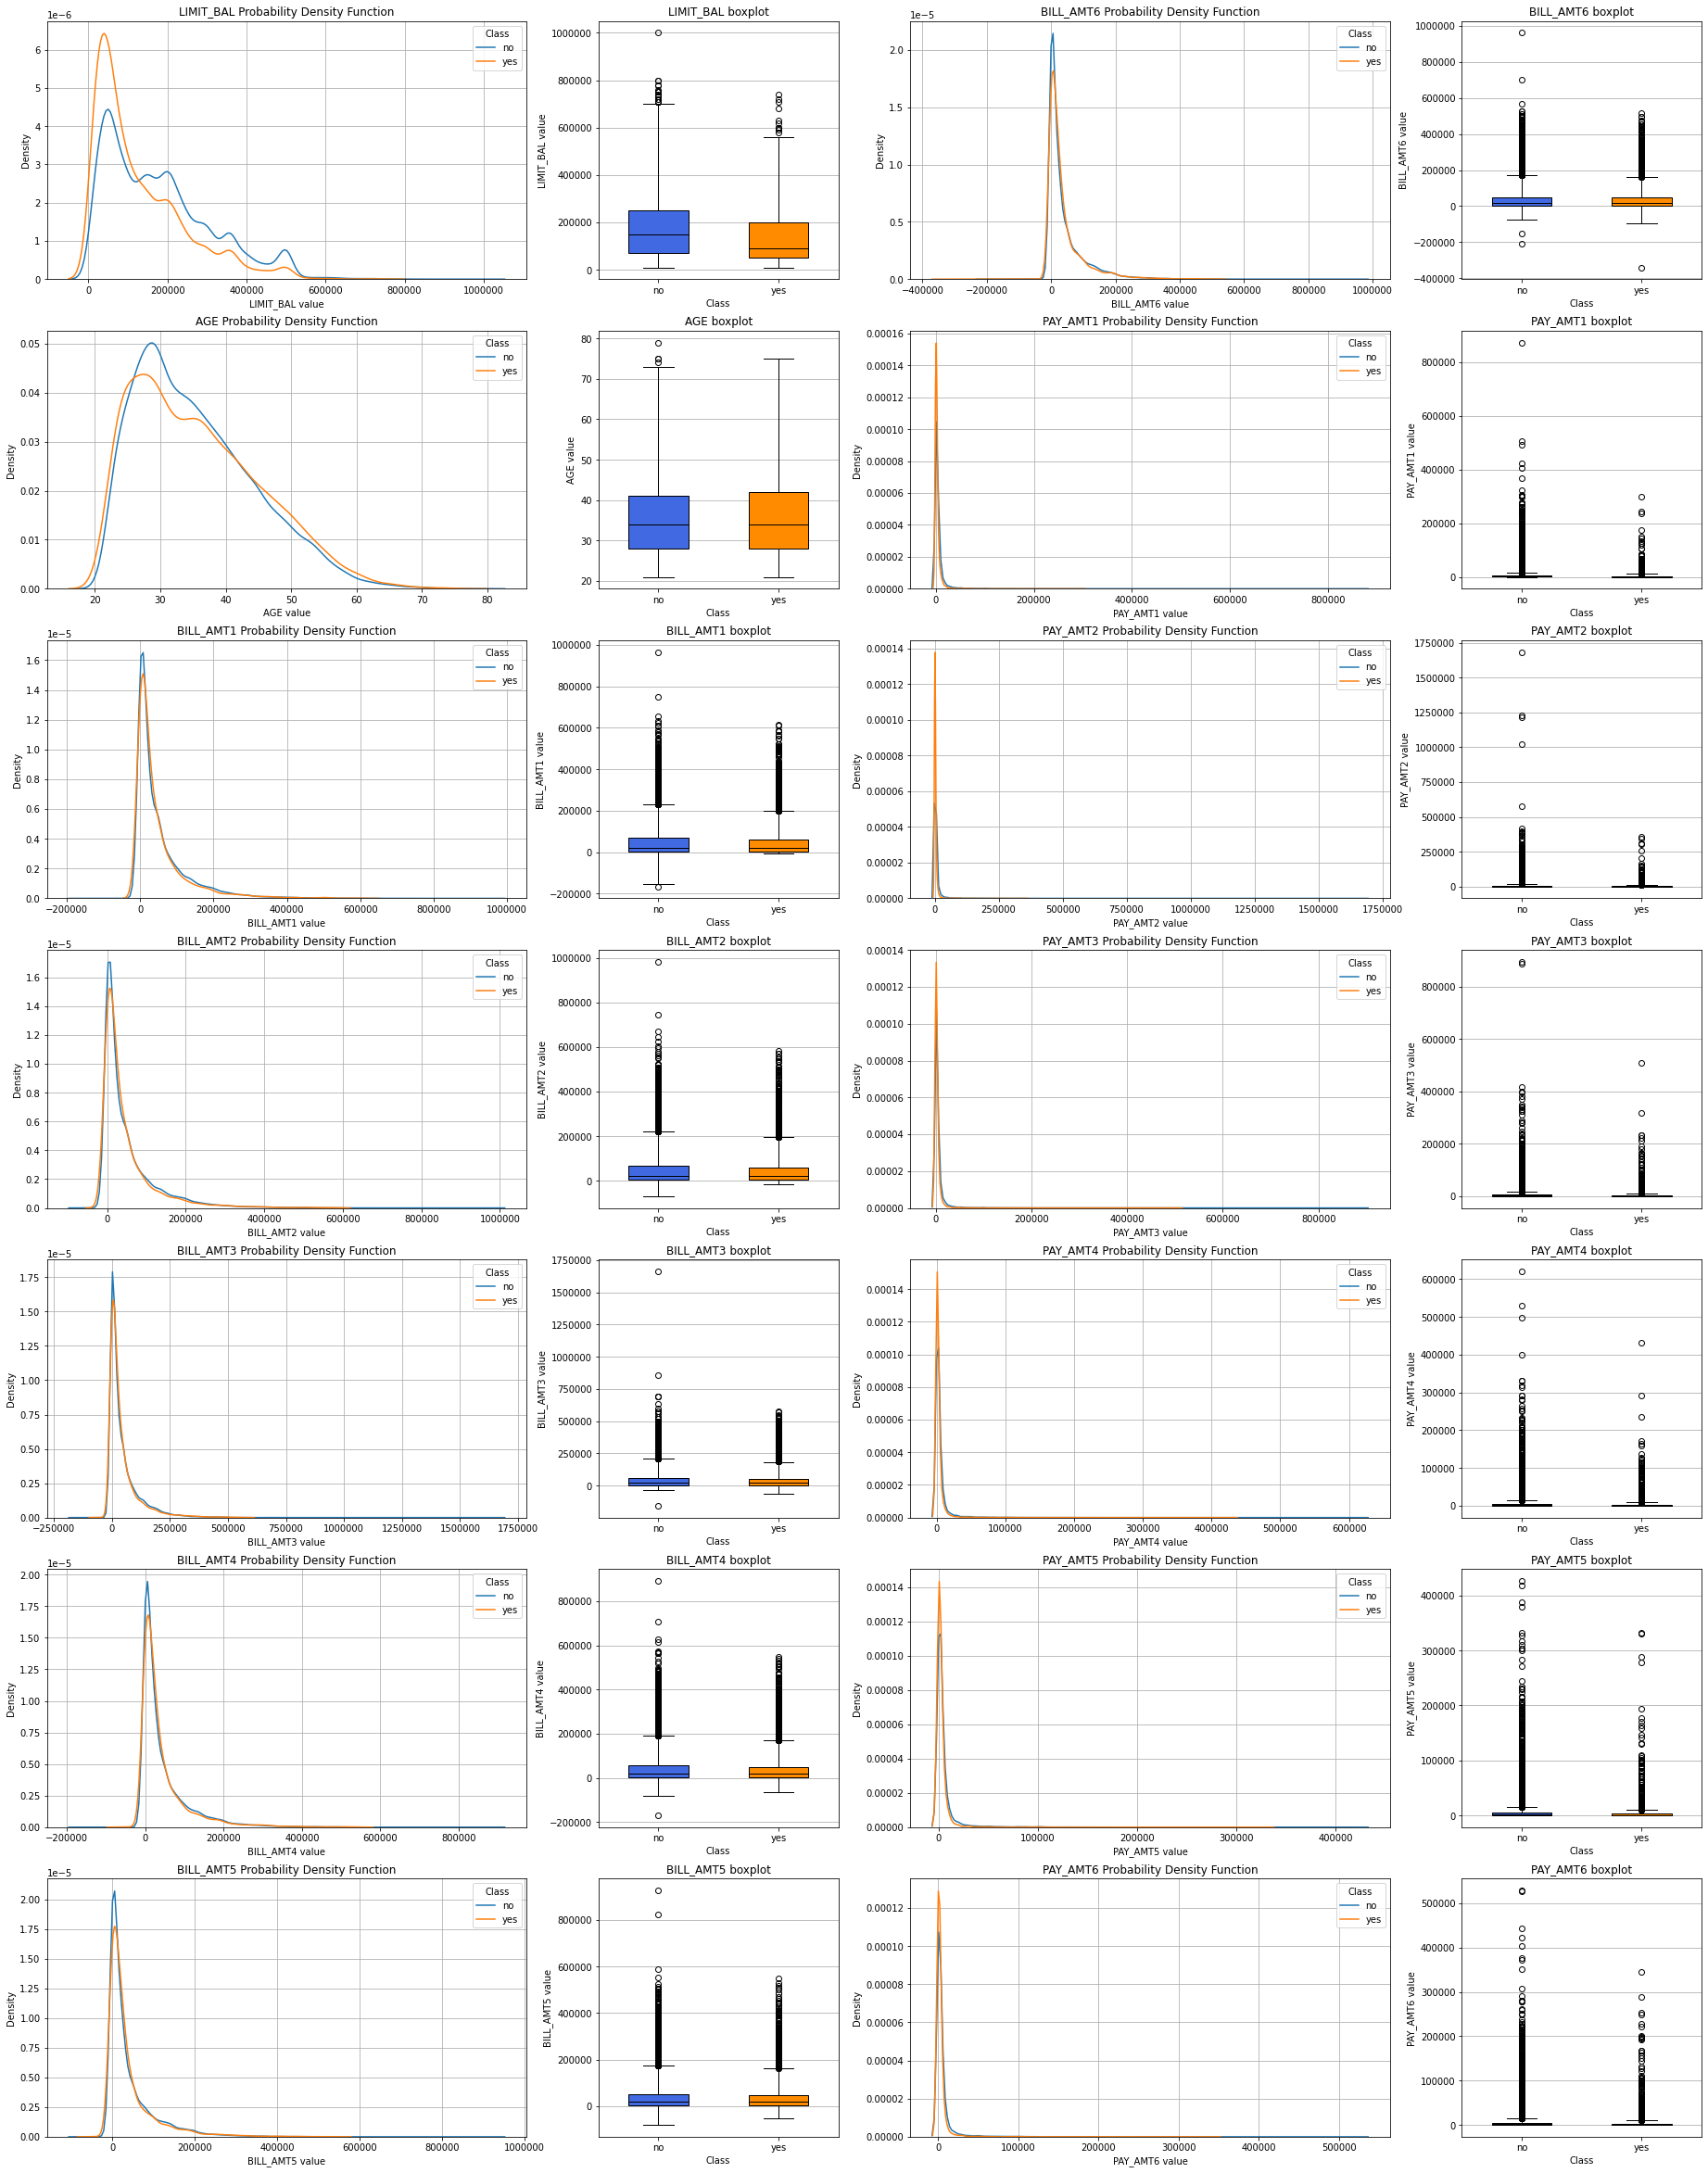

In [17]:
fig, ax = plt.subplots(nrows=7,ncols=4,figsize=(32, len(numerical)*3), gridspec_kw={'width_ratios': [2, 1, 2, 1]})

for j,i in enumerate(numerical):

    data=[np.array(noDf[i]), np.array(yesDf[i])]

    ax[j%7,0+2*(j//7)].grid(zorder=0, axis='both')

    sns.kdeplot(np.array(data[0]), ax=ax[j%7,0+2*(j//7)] , label='no')
    sns.kdeplot(np.array(data[1]), ax=ax[j%7,0+2*(j//7)] , label='yes')

    ax[j%7,0+2*(j//7)].set(xlabel=f'{i} value')

    ax[j%7,0+2*(j//7)].set_title(f'{i} Probability Density Function')
    ax[j%7,0+2*(j//7)].ticklabel_format(style='plain', axis='x')    # to prevent scientific notation.
    ax[j%7,0+2*(j//7)].legend(title='Class')       


    colors = ['royalblue', 'darkorange']

    ax[j%7,1+2*(j//7)].grid(zorder=0, axis='y')

    bp=ax[j%7,1+2*(j//7)].boxplot(data,vert = 1,patch_artist=True, widths=[.5,.5], labels=['no','yes'], whis=2.5)

    for median in bp['medians']:
        median.set(color ='black')

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    ax[j%7,1+2*(j//7)].set(xlabel='Class', ylabel=f'{i} value')
    ax[j%7,1+2*(j//7)].ticklabel_format(style='plain', axis='y')    # to prevent scientific notation.
    ax[j%7,1+2*(j//7)].set_title(f'{i} boxplot')
    
plt.savefig("num.eps")
plt.show()

<ipython-input-18-172b67635fd5>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[j%4,0+2*(j//4)].set_xticklabels(labels_renamed[i], rotation = 20, ha="right")
<ipython-input-18-172b67635fd5>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[j%4,1+2*(j//4)].set_xticklabels(labels_renamed[i], rotation = 20, ha="right")
<ipython-input-18-172b67635fd5>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[j%4,0+2*(j//4)].set_xticklabels(labels_renamed[i], rotation = 20, ha="right")
<ipython-input-18-172b67635fd5>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[j%4,1+2*(j//4)].set_xticklabels(labels_renamed[i], rotation = 20, ha="right")
<ipython-input-18-172b67635fd5>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[j%4,0+2*(j//4)].set_xticklabels(labels_renamed[i], rotation = 20, ha="right")
<ipython-input-18-172b67635fd5

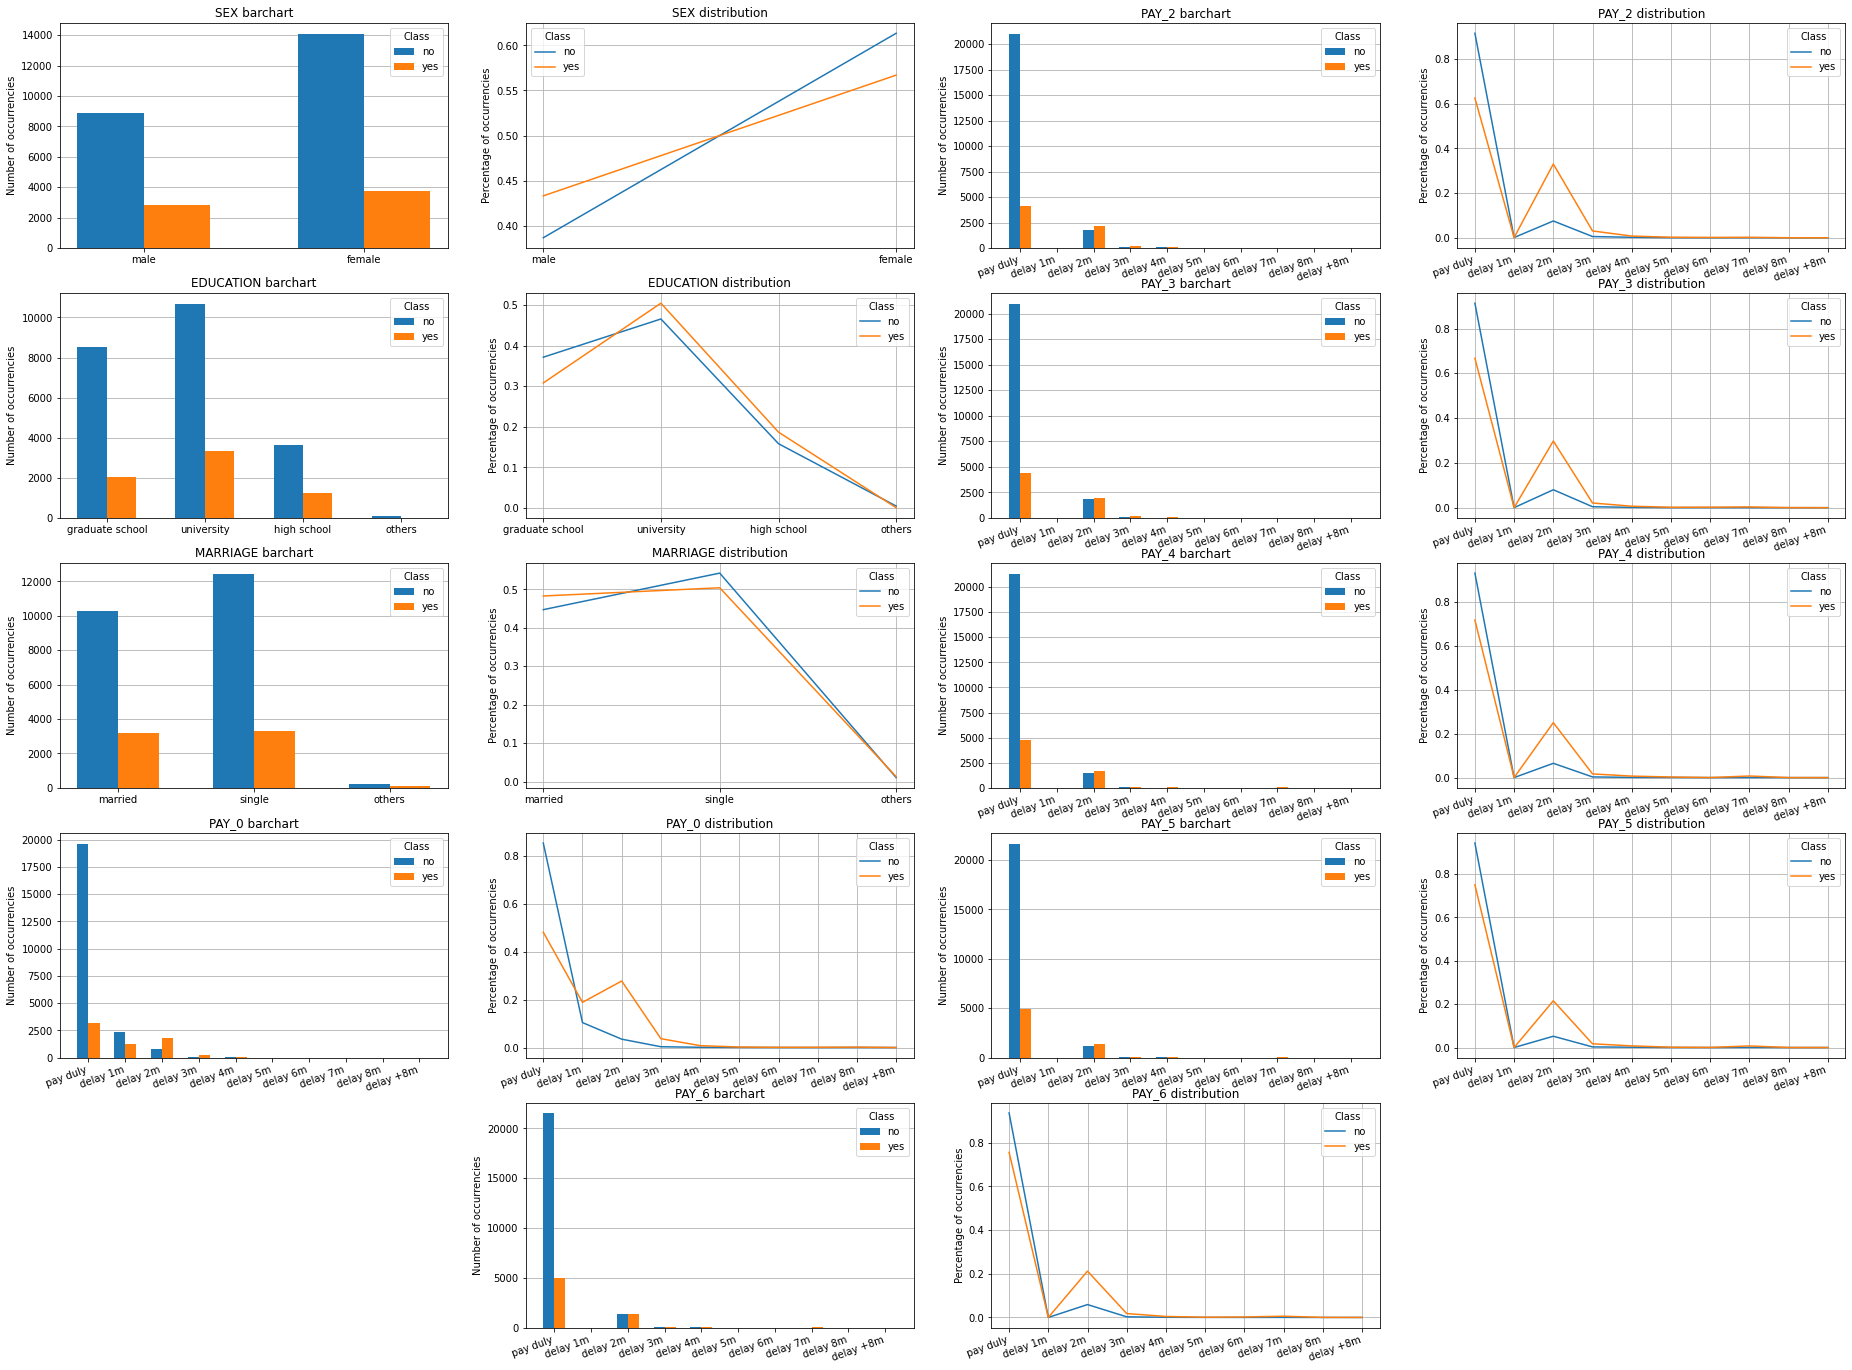

In [18]:
fig, ax = plt.subplots(nrows=5,ncols=4,figsize=(32, 24))

for j,i in enumerate(categorical[:-1]):
    
#         plt.figure(figsize=(13,6))
#         plt.rc('axes', axisbelow=True)
    ax[j%4,0+2*(j//4)].grid(zorder=0, axis='y')
    plot_data = [noDf[i].value_counts(), yesDf[i].value_counts()]

    if i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
        for q in [-1,1,2,3,4,5,6,7,8,9]:
            for k in [0,1]:
                if q not in plot_data[k].index:
                    plot_data[k].loc[q]=0
                        

    ax[j%4,0+2*(j//4)].bar(labels_renamed[i], plot_data[0].sort_index().values,width=-0.3,align="edge", label='no')
    ax[j%4,0+2*(j//4)].bar(labels_renamed[i], plot_data[1].sort_index().values,width=0.3,align="edge", label = 'yes')

    ax[j%4,0+2*(j//4)].set(ylabel='Number of occurrencies')

    ax[j%4,0+2*(j//4)].set_title(f'{i} barchart')
    ax[j%4,0+2*(j//4)].legend(title='Class')

    
    ax[j%4,1+2*(j//4)].grid(zorder=0, axis='both')        
# #         ax.bar(labels_renamed[i], plot_data[0].sort_index().values/counts[0],width=-0.3,align="edge", label='no')
# #         ax.bar(labels_renamed[i], plot_data[1].sort_index().values/counts[1],width=0.3,align="edge", label = 'yes')        
    ax[j%4,1+2*(j//4)].plot(labels_renamed[i], plot_data[0].sort_index().values/counts[0], label='no')
    ax[j%4,1+2*(j//4)].plot(labels_renamed[i], plot_data[1].sort_index().values/counts[1], label = 'yes')
    
    ax[j%4,1+2*(j//4)].set(ylabel='Percentage of occurrencies')

    ax[j%4,1+2*(j//4)].set_title(f'{i} distribution')
    ax[j%4,1+2*(j//4)].legend(title='Class')
    
    if i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
        ax[j%4,0+2*(j//4)].set_xticklabels(labels_renamed[i], rotation = 20, ha="right")
        ax[j%4,1+2*(j//4)].set_xticklabels(labels_renamed[i], rotation = 20, ha="right")

ax[4,1].grid(zorder=0, axis='y')

plot_data = [noDf[categorical[-1]].value_counts(), yesDf[categorical[-1]].value_counts()]

if categorical[-1] in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    for q in [-1,1,2,3,4,5,6,7,8,9]:
        for k in [0,1]:
            if q not in plot_data[k].index:
                plot_data[k].loc[q]=0
                        

ax[4,1].bar(labels_renamed[categorical[-1]], plot_data[0].sort_index().values,width=-0.3,align="edge", label='no')
ax[4,1].bar(labels_renamed[categorical[-1]], plot_data[1].sort_index().values,width=0.3,align="edge", label = 'yes')

ax[4,1].set(ylabel='Number of occurrencies')

ax[4,1].set_title(f'{categorical[-1]} barchart')
ax[4,1].legend(title='Class')


ax[4,2].grid(zorder=0, axis='both')        
# #         ax.bar(labels_renamed[i], plot_data[0].sort_index().values/counts[0],width=-0.3,align="edge", label='no')
# #         ax.bar(labels_renamed[i], plot_data[1].sort_index().values/counts[1],width=0.3,align="edge", label = 'yes')        
ax[4,2].plot(labels_renamed[categorical[-1]], plot_data[0].sort_index().values/counts[0], label='no')
ax[4,2].plot(labels_renamed[categorical[-1]], plot_data[1].sort_index().values/counts[1], label = 'yes')

ax[4,2].set(ylabel='Percentage of occurrencies')

ax[4,2].set_title(f'{categorical[-1]} distribution')
ax[4,2].legend(title='Class')


ax[4,1].set_xticklabels(labels_renamed[categorical[-1]], rotation = 20, ha="right")
ax[4,2].set_xticklabels(labels_renamed[categorical[-1]], rotation = 20, ha="right")

ax[4,0].axis('off')
ax[4,3].axis('off')

plt.savefig("cat.eps")
plt.show()

# One Hot Encoding on categorical

In [19]:
one_hot_encodable = ['EDUCATION', 'MARRIAGE']
out_cat_ohe = []
for cat in one_hot_encodable:
    for i in range(initial_df[cat].unique().shape[0]):
        out_cat_ohe.append(f'{cat}_{i}')
    
enc = OneHotEncoder(drop = None, handle_unknown='ignore', sparse=False)
initial_df[out_cat_ohe] = enc.fit_transform(initial_df[one_hot_encodable]).astype('int32')
initial_df = initial_df.drop(one_hot_encodable, axis=1)

out_col = list(initial_df.columns)
out_col.append('default payment next month')
out_col.remove('default payment next month')
initial_df = initial_df.reindex(columns=out_col)

In [20]:
initial_df=initial_df.drop('index',axis=1)

# Correlation analysis


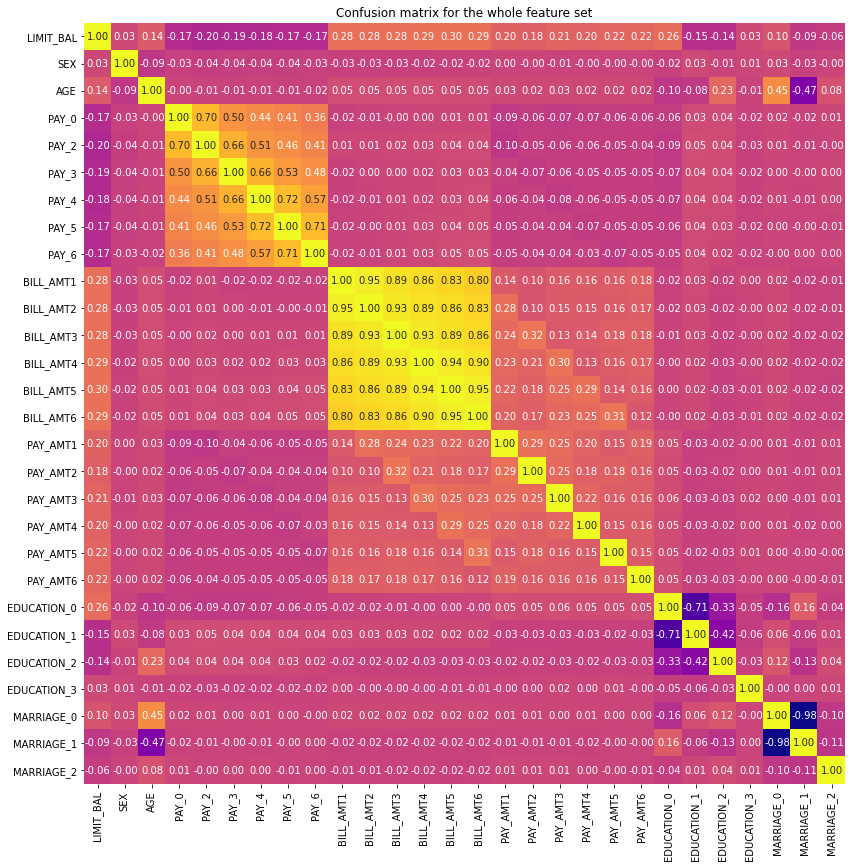

In [21]:
fig = plt.figure(figsize =(16,14))   
sns.heatmap(initial_df.iloc[:,:-1].corr(), annot=True, fmt='1.2f', cmap='plasma', square=True, cbar=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Confusion matrix for the whole feature set')
plt.show()

# Outliers removal

In [22]:
numerical_removed = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [23]:
numericDf = initial_df.loc[:, numerical_removed]

Q1 = numericDf.quantile(0.25)
Q3 = numericDf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0
LIMIT_BAL    190000.00
AGE              13.00
BILL_AMT1     63157.75
PAY_AMT1       4006.00
PAY_AMT2       4164.00
PAY_AMT3       4110.00
PAY_AMT4       3719.00
PAY_AMT5       3793.50
PAY_AMT6       3850.00
dtype: float64


In [24]:
numDfOut = numericDf[~((numericDf < (Q1 - 2.5 * IQR)) |(numericDf > (Q3 + 2.5 * IQR))).any(axis=1)].index

In [25]:
noOutliersDf = initial_df.iloc[numDfOut,:].drop(columns = ['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','MARRIAGE_1', 'EDUCATION_1'])

In [26]:
noOutliersDf.T

,0,1,2,3,5,7,8,9,10,12,...,29550,29551,29552,29555,29556,29557,29558,29560,29562,29565
0,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,20000,120000,90000,50000,50000,100000,140000,20000,200000,630000,...,30000,240000,360000,150000,140000,210000,10000,80000,150000,50000
SEX,1,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
AGE,24,26,34,37,37,23,28,35,34,41,...,38,30,35,35,41,34,43,34,43,46
PAY_0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,3,-1,2,-1,-1
PAY_2,2,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,2,-1,2,-1,-1
PAY_3,-1,-1,-1,-1,-1,-1,2,-1,2,-1,...,-1,-1,-1,-1,-1,2,-1,2,-1,-1
PAY_4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,2,-1,2,-1,-1
PAY_5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,2,-1,2,-1,-1
PAY_6,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,2,-1,2,-1,-1


# Standardization

In [27]:
xDf = noOutliersDf.iloc[:,:-1]
yDf = noOutliersDf.iloc[:,-1]

In [28]:
scaler = StandardScaler()
# xDf = scaler.fit_transform(xDf)
xDf[numerical_removed + ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = scaler.fit_transform(xDf[numerical_removed + ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])

In [29]:
xDf.T

,0,1,2,3,5,7,8,9,10,12,...,29550,29551,29552,29555,29556,29557,29558,29560,29562,29565
0,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,-1.074906,-0.190117,-0.455554,-0.809469,-0.809469,-0.367075,-0.013159,-1.074906,0.517715,4.322310,...,-0.986427,0.871631,1.933378,0.075320,-0.013159,0.606194,-1.163385,-0.544033,0.075320,-0.809469
SEX,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AGE,-1.204300,-0.991322,-0.139414,0.180052,0.180052,-1.310788,-0.778345,-0.032925,-0.139414,0.606006,...,0.286541,-0.565368,-0.032925,-0.032925,0.606006,-0.139414,0.818984,-0.139414,0.818984,1.138449
PAY_0,1.947174,-0.555969,-0.555969,-0.555969,-0.555969,-0.555969,-0.555969,-0.555969,-0.555969,-0.555969,...,-0.555969,-0.555969,-0.555969,-0.555969,-0.555969,2.781555,-0.555969,1.947174,-0.555969,-0.555969
PAY_2,2.006303,2.006303,-0.448650,-0.448650,-0.448650,-0.448650,-0.448650,-0.448650,-0.448650,-0.448650,...,-0.448650,-0.448650,-0.448650,-0.448650,-0.448650,2.006303,-0.448650,2.006303,-0.448650,-0.448650
PAY_3,-0.433508,-0.433508,-0.433508,-0.433508,-0.433508,-0.433508,2.055405,-0.433508,2.055405,-0.433508,...,-0.433508,-0.433508,-0.433508,-0.433508,-0.433508,2.055405,-0.433508,2.055405,-0.433508,-0.433508
PAY_4,-0.388427,-0.388427,-0.388427,-0.388427,-0.388427,-0.388427,-0.388427,-0.388427,-0.388427,-0.388427,...,-0.388427,-0.388427,-0.388427,-0.388427,-0.388427,2.202853,-0.388427,2.202853,-0.388427,-0.388427
PAY_5,-0.353242,-0.353242,-0.353242,-0.353242,-0.353242,-0.353242,-0.353242,-0.353242,-0.353242,-0.353242,...,-0.353242,-0.353242,-0.353242,-0.353242,-0.353242,2.394803,-0.353242,2.394803,-0.353242,-0.353242
PAY_6,-0.357972,2.403597,-0.357972,-0.357972,-0.357972,-0.357972,-0.357972,-0.357972,-0.357972,-0.357972,...,-0.357972,-0.357972,-0.357972,-0.357972,-0.357972,2.403597,-0.357972,2.403597,-0.357972,-0.357972


# Principal Component Analysis

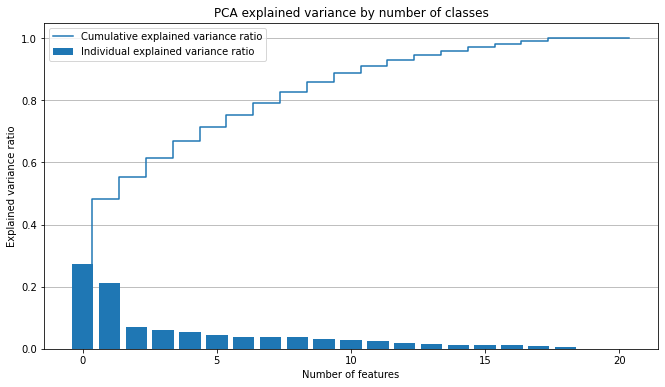

In [30]:
pca = PCA(n_components=21)

# X_transformed = pca.fit_transform(scaler.fit_transform(initial_df.iloc[:,:-1]))
X_transformed = pca.fit_transform(xDf)

var_ratios = np.array(pca.explained_variance_ratio_)
var_ratios_cum = np.cumsum(var_ratios)

plt.figure(figsize=(11,6))
plt.rc('axes', axisbelow=True)
plt.grid(zorder=0, axis='y')
fig1 = plt.bar(range(var_ratios.shape[0]), var_ratios, label = 'Individual explained variance ratio')
fig2 = plt.step(np.array(range(var_ratios_cum.shape[0]))+fig1.patches[0].get_width()/2.25, var_ratios_cum, label = 'Cumulative explained variance ratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Number of features')
plt.title('PCA explained variance by number of classes')
plt.legend()
plt.show()

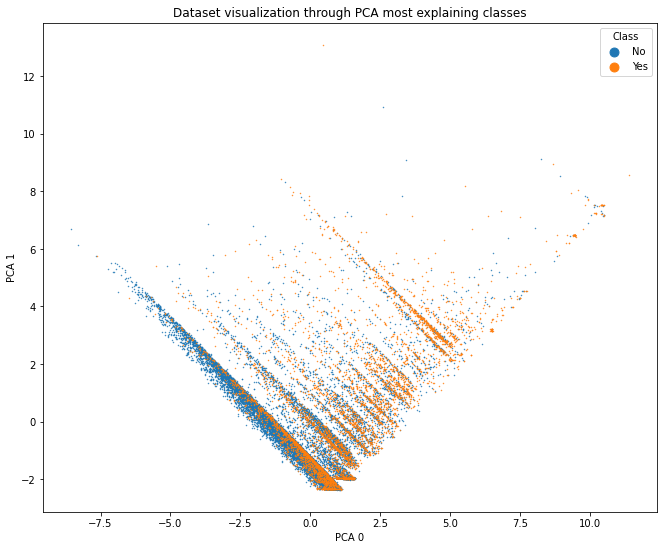

In [31]:
XTrY = X_transformed[yDf==1]
XTrN = X_transformed[yDf==0]

plt.figure(figsize=(11,9))
plt.scatter(XTrN[:,0], XTrN[:,1], s=0.2, label= 'No')
plt.scatter(XTrY[:,0], XTrY[:,1], s=0.2, label= 'Yes')
plt.legend(title='Class', scatterpoints=1, markerscale=20)
plt.ylabel('PCA 1')
plt.xlabel('PCA 0')
plt.title('Dataset visualization through PCA most explaining classes')
plt.show()

# Hyperparameters Tuning

In [32]:
catSMOTE = [i in categorical for i in xDf.columns]
xDf = xDf.values

In [117]:
oversampler = SMOTENC(catSMOTE)
X_smote, y_smote = oversampler.fit_resample(xDf, yDf)
params = [{'criterion':['gini','entropy'],
           'max_depth':[None, 10]},
          {'n_estimators':[100,200],
           'criterion':['gini','entropy'],
           'max_depth':[None, 10]},
          {'penalty':['l1','l2'],
           'C':[1,2],
           'max_iter': [10000],
           'dual':[False]},
          {'penalty':['l1','l2'],
           'C':[1,2],
           'max_iter': [1000],
           'solver': ['liblinear']}]
algos = [DecisionTreeClassifier(), RandomForestClassifier(), LinearSVC(), LogisticRegression()]

for algo, par in zip(algos, params):
    clf = GridSearchCV(algo, par, scoring='f1')
    clf.fit(X_smote, y_smote)
    print(pd.DataFrame(clf.cv_results_)[['params', 'mean_test_score', 'rank_test_score']])

                                        params  mean_test_score  \
0     {'criterion': 'gini', 'max_depth': None}         0.735154   
1       {'criterion': 'gini', 'max_depth': 10}         0.706446   
2  {'criterion': 'entropy', 'max_depth': None}         0.742284   
3    {'criterion': 'entropy', 'max_depth': 10}         0.712104   

   rank_test_score  
0                2  
1                4  
2                1  
3                3  
                                              params  mean_test_score  \
0  {'criterion': 'gini', 'max_depth': None, 'n_es...         0.822091   
1  {'criterion': 'gini', 'max_depth': None, 'n_es...         0.822565   
2  {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.721157   
3  {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.721443   
4  {'criterion': 'entropy', 'max_depth': None, 'n...         0.822103   
5  {'criterion': 'entropy', 'max_depth': None, 'n...         0.824845   
6  {'criterion': 'entropy', 'max_depth': 10, 'n_

# Final training and evaluation (+ SMOTE)

Fold number:  1
Number of Yes istances: 5043
Number of No istances: 15172
SMOTE...
Number of Yes istances: 15172
Number of No istances: 15172
Decision Tree:
f1: 0.4175298804780877
accuracy: 0.6746773475745438


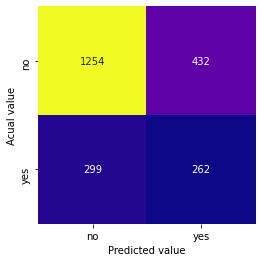

Random Forest:
f1: 0.534562211981567
accuracy: 0.7752558967512239


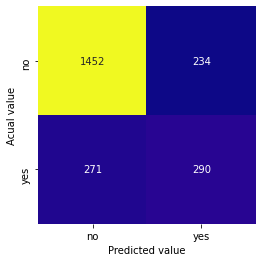

Support Vector Machine:
f1: 0.5747899159663865
accuracy: 0.7748108589230085


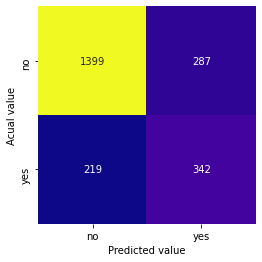

Logistic Regressor:
f1: 0.5740131578947368
accuracy: 0.7694704049844237


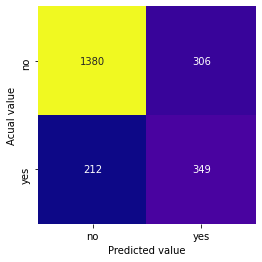

Fold number:  2
Number of Yes istances: 5043
Number of No istances: 15172
SMOTE...
Number of Yes istances: 15172
Number of No istances: 15172
Decision Tree:
f1: 0.39902280130293155
accuracy: 0.671562082777036


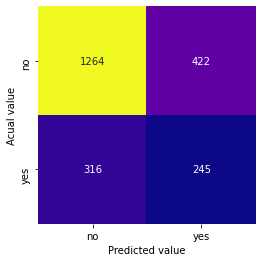

Random Forest:
f1: 0.5169811320754717
accuracy: 0.7721406319537161


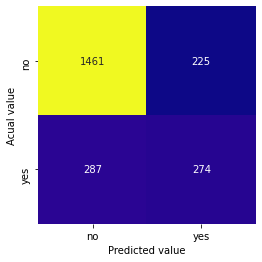

Support Vector Machine:
f1: 0.5360134003350083
accuracy: 0.7534490431686693


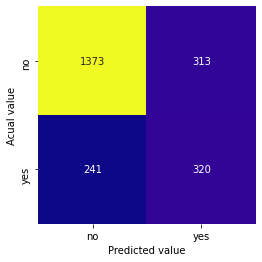

Logistic Regressor:
f1: 0.5336617405582923
accuracy: 0.7472185135736538


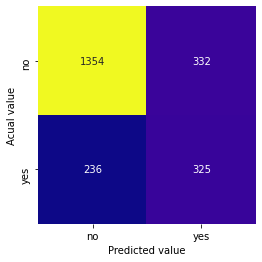

Fold number:  3
Number of Yes istances: 5043
Number of No istances: 15173
SMOTE...
Number of Yes istances: 15173
Number of No istances: 15173
Decision Tree:
f1: 0.3981117230527144
accuracy: 0.6593944790739091


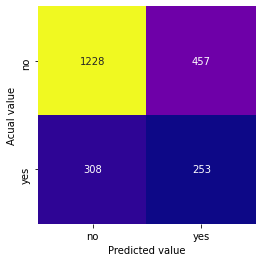

Random Forest:
f1: 0.5419708029197081
accuracy: 0.7764915405164737


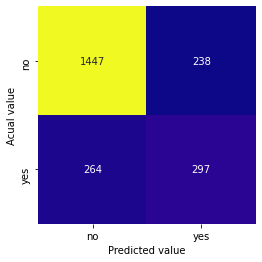

Support Vector Machine:
f1: 0.5764705882352942
accuracy: 0.7756010685663401


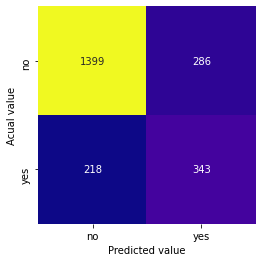

Logistic Regressor:
f1: 0.5761047463175123
accuracy: 0.7693677649154052


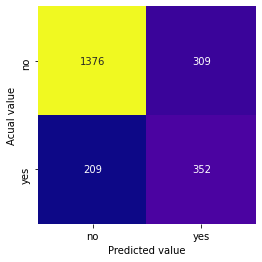

Fold number:  4
Number of Yes istances: 5043
Number of No istances: 15173
SMOTE...
Number of Yes istances: 15173
Number of No istances: 15173
Decision Tree:
f1: 0.431275720164609
accuracy: 0.6923419412288513


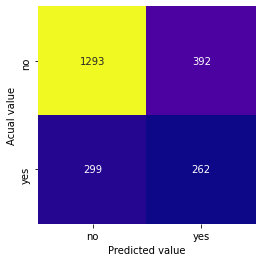

Random Forest:
f1: 0.5301204819277108
accuracy: 0.7742653606411398


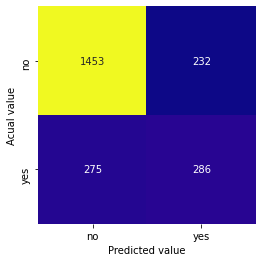

Support Vector Machine:
f1: 0.5568760611205433
accuracy: 0.767586821015138


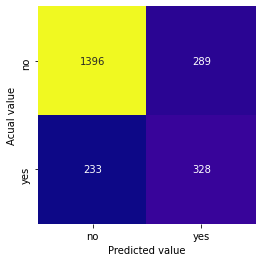

Logistic Regressor:
f1: 0.565289256198347
accuracy: 0.7658058771148709


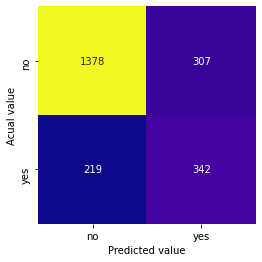

Fold number:  5
Number of Yes istances: 5044
Number of No istances: 15172
SMOTE...
Number of Yes istances: 15172
Number of No istances: 15172
Decision Tree:
f1: 0.43559718969555034
accuracy: 0.6780943900267141


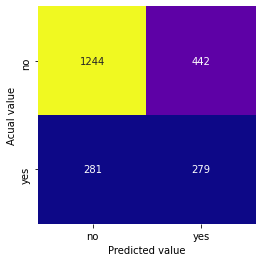

Random Forest:
f1: 0.5179584120982985
accuracy: 0.7729296527159395


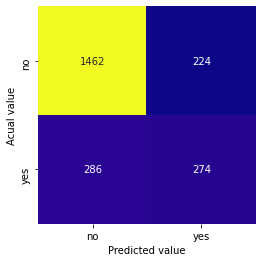

Support Vector Machine:
f1: 0.5660699062233588
accuracy: 0.7733748886910062


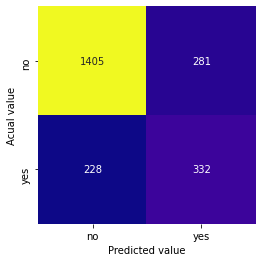

Logistic Regressor:
f1: 0.5690376569037657
accuracy: 0.7707034728406055


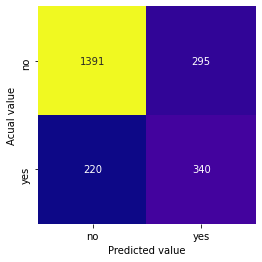

Fold number:  6
Number of Yes istances: 5044
Number of No istances: 15172
SMOTE...
Number of Yes istances: 15172
Number of No istances: 15172
Decision Tree:
f1: 0.44568690095846647
accuracy: 0.691006233303651


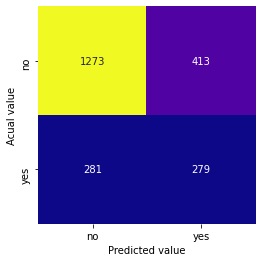

Random Forest:
f1: 0.5459610027855154
accuracy: 0.782279608192342


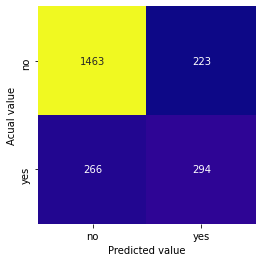

Support Vector Machine:
f1: 0.5541346973572038
accuracy: 0.7671415850400712


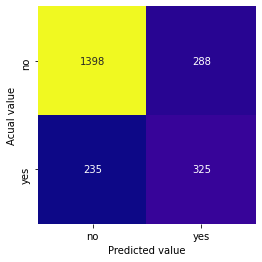

Logistic Regressor:
f1: 0.558061821219716
accuracy: 0.7644701691896705


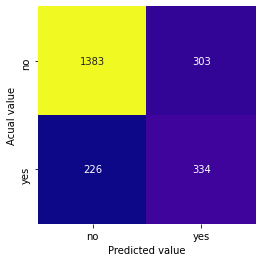

Fold number:  7
Number of Yes istances: 5044
Number of No istances: 15172
SMOTE...
Number of Yes istances: 15172
Number of No istances: 15172
Decision Tree:
f1: 0.4204809930178433
accuracy: 0.6674087266251113


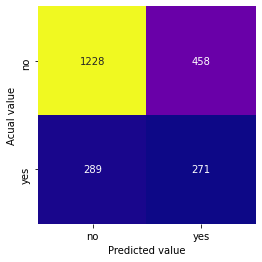

Random Forest:
f1: 0.5180388529139686
accuracy: 0.7680320569902048


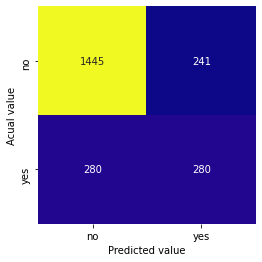

Support Vector Machine:
f1: 0.5350210970464134
accuracy: 0.7546749777382012


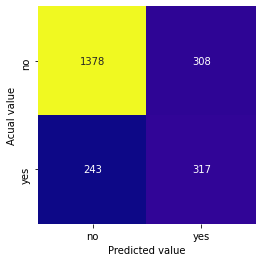

Logistic Regressor:
f1: 0.5378850957535388
accuracy: 0.7528940338379341


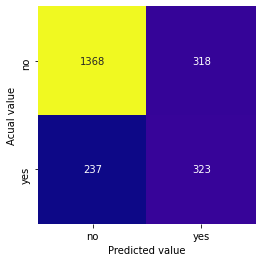

Fold number:  8
Number of Yes istances: 5044
Number of No istances: 15172
SMOTE...
Number of Yes istances: 15172
Number of No istances: 15172
Decision Tree:
f1: 0.40699523052464226
accuracy: 0.667853962600178


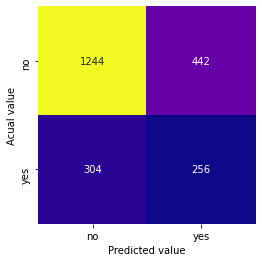

Random Forest:
f1: 0.5615671641791045
accuracy: 0.7907390917186109


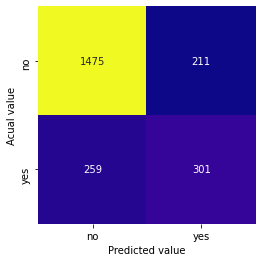

Support Vector Machine:
f1: 0.5512489233419465
accuracy: 0.7680320569902048


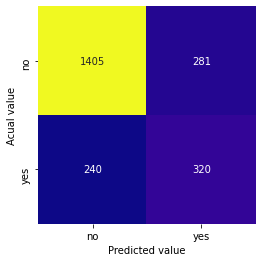

Logistic Regressor:
f1: 0.5579831932773109
accuracy: 0.7658058771148709


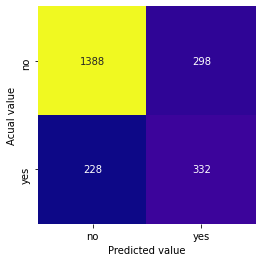

Fold number:  9
Number of Yes istances: 5044
Number of No istances: 15172
SMOTE...
Number of Yes istances: 15172
Number of No istances: 15172
Decision Tree:
f1: 0.43898573692551507
accuracy: 0.684772929652716


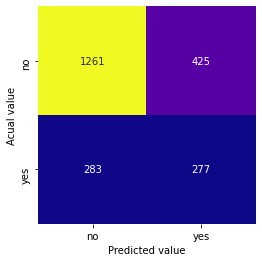

Random Forest:
f1: 0.538390379278446
accuracy: 0.7778272484416741


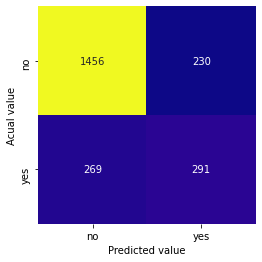

Support Vector Machine:
f1: 0.5489864864864865
accuracy: 0.7622439893143366


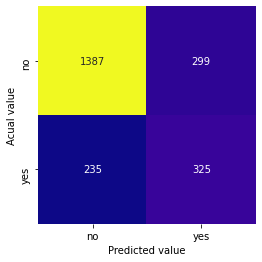

Logistic Regressor:
f1: 0.5533661740558292
accuracy: 0.7577916295636687


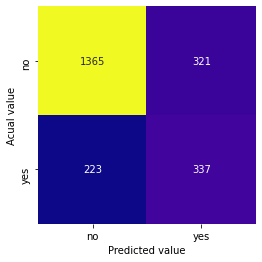

Fold number:  10
Number of Yes istances: 5044
Number of No istances: 15172
SMOTE...
Number of Yes istances: 15172
Number of No istances: 15172
Decision Tree:
f1: 0.44305772230889234
accuracy: 0.6821015138023152


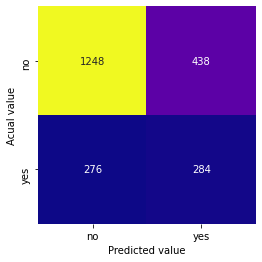

Random Forest:
f1: 0.5136921624173749
accuracy: 0.7707034728406055


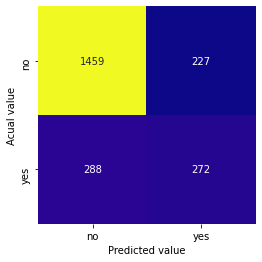

Support Vector Machine:
f1: 0.5321888412017168
accuracy: 0.757346393588602


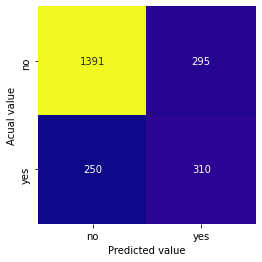

Logistic Regressor:
f1: 0.5384615384615384
accuracy: 0.7542297417631345


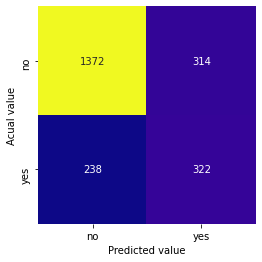

In [124]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
splits = skf.split(xDf,yDf)
DT_metrics = []
RF_metrics = []
SVM_metrics = []
LR_metrics = []

for i, (train, test) in enumerate(splits):
    print("Fold number: ", i+1)
    X_train, X_test = xDf[train], xDf[test]
    y_train, y_test = yDf.values[train], yDf.values[test]
    
    print(f'Number of Yes istances: {sum(y_train)}')
    print(f'Number of No istances: {y_train.shape[0]-sum(y_train)}')
    print('SMOTE...')
    oversampler = SMOTENC(catSMOTE)
    X_train, y_train = oversampler.fit_resample(X_train, y_train)
    print(f'Number of Yes istances: {sum(y_train)}')
    print(f'Number of No istances: {y_train.shape[0]-sum(y_train)}')
    
    print('Decision Tree:')
    DT = DecisionTreeClassifier(criterion = 'entropy')
    DT.fit(X_train, y_train)
    y_predDT = DT.predict(X_test)
    f1DT = f1_score(y_test, y_predDT)
    accDT = accuracy_score(y_test, y_predDT)
    cmDT = confusion_matrix(y_test, y_predDT)
    sDT = sns.heatmap(cmDT, annot=True, cmap='plasma', fmt='g', square=True, cbar=False, xticklabels=truth_labels_renamed, yticklabels=truth_labels_renamed)
    sDT.set(xlabel='Predicted value', ylabel = 'Acual value')
    print(f'f1: {f1DT}')
    print(f'accuracy: {accDT}')
    plt.show()
    DT_metrics.append([accDT,f1DT])
    
    print('Random Forest:')
    RF = RandomForestClassifier(criterion = 'entropy', n_estimators=200)
    RF.fit(X_train, y_train)
    y_predRF = RF.predict(X_test)    
    f1RF = f1_score(y_test, y_predRF)
    accRF = accuracy_score(y_test, y_predRF)
    cmRF = confusion_matrix(y_test, y_predRF)
    sRF = sns.heatmap(cmRF, annot=True, cmap='plasma', fmt='g', square=True, cbar=False, xticklabels=truth_labels_renamed, yticklabels=truth_labels_renamed)
    sRF.set(xlabel='Predicted value', ylabel = 'Acual value')
    print(f'f1: {f1RF}')
    print(f'accuracy: {accRF}')
    plt.show()    
    RF_metrics.append([accRF,f1RF])  
    
    print('Support Vector Machine:')
    SVM = LinearSVC(max_iter=10000)
    SVM.fit(X_train, y_train)
    y_predSVM = SVM.predict(X_test)
    accSVM = accuracy_score(y_test, y_predSVM)
    f1SVM = f1_score(y_test, y_predSVM)
    cmSVM = confusion_matrix(y_test, y_predSVM)
    sSVM = sns.heatmap(cmSVM, annot=True, cmap='plasma', fmt='g', square=True, cbar=False, xticklabels=truth_labels_renamed, yticklabels=truth_labels_renamed)
    sSVM.set(xlabel='Predicted value', ylabel = 'Acual value')
    print(f'f1: {f1SVM}')
    print(f'accuracy: {accSVM}')
    plt.show()
    SVM_metrics.append([accSVM,f1SVM])
    
    print('Logistic Regressor:')
    LR = LogisticRegression(penalty = 'l1', C = 2, solver='liblinear', max_iter=1000)
    LR.fit(X_train, y_train)
    y_predLR = LR.predict(X_test)
    accLR = accuracy_score(y_test, y_predLR)
    f1LR = f1_score(y_test, y_predLR)
    cmLR = confusion_matrix(y_test, y_predLR)
    sLR = sns.heatmap(cmLR, annot=True, cmap='plasma', fmt='g', square=True, cbar=False, xticklabels=truth_labels_renamed, yticklabels=truth_labels_renamed)
    sLR.set(xlabel='Predicted value', ylabel = 'Acual value')
    print(f'f1: {f1LR}')
    print(f'accuracy: {accLR}')
    plt.show()
    LR_metrics.append([accLR,f1LR])
    

# Results visualization

In [125]:
DT_metrics = np.average(np.array(DT_metrics), axis=0)
RF_metrics = np.average(np.array(RF_metrics), axis=0)
SVM_metrics = np.average(np.array(SVM_metrics), axis=0)
LR_metrics = np.average(np.array(LR_metrics), axis=0)

In [127]:
metrics_final = np.stack([DT_metrics, RF_metrics, SVM_metrics, LR_metrics])
plotting = {'who': ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'Logistic Regressor'],
            'acc':metrics_final[:,0],
            'f1':metrics_final[:,1]}

graph = pd.DataFrame(plotting)
fig = go.Figure()


fig.add_trace(go.Bar(x=-graph['acc'].values,
                     y=graph['who'].values,
                     orientation='h',
                     name='Accuracy score (avg)',
                     customdata=graph['acc'],
                     hovertemplate = "%{y}: %{customdata}"))

fig.add_trace(go.Bar(x=graph['f1'].values,
                     y=graph['who'].values,
                     orientation='h',
                     name='F1 score (avg)',
                     customdata=graph['f1'],
                     hovertemplate = "%{y}: %{customdata}"))
    
fig.update_layout(barmode='relative', 
                  height=400, 
                  width=1100, 
                  yaxis_autorange='reversed',
                  bargap=0.01,
                  legend_orientation ='h',
                  legend_x=0.35, legend_y=1.2
                 )
fig


In [128]:
print(metrics_final)

[[0.67692136 0.42367439]
 [0.77606646 0.53192426]
 [0.76542617 0.55317999]
 [0.76177575 0.55638644]]


In [ ]:
# tried SVM with rbf kernel: discarded (doesn't show a clear improvement w.r.t. linear, much more time consuming (O(n^2)))